In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import load_model, Model
from tensorflow import keras
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.spatial import distance
from pathlib import Path
import os
from tensorflow.keras.layers import Conv2D, Add, UpSampling2D,Layer,Input
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Dot,Activation
from tensorflow.keras.layers import Lambda
import cv2



2024-11-08 15:18:01.197882: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-08 15:18:01.363034: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-08 15:18:01.422222: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-08 15:18:01.438969: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-08 15:18:01.546921: I tensorflow/core/platform/cpu_feature_guar

In [3]:

cv2.utils.logging.setLogLevel(cv2.utils.logging.LOG_LEVEL_SILENT)

AttributeError: module 'cv2.utils' has no attribute 'logging'

In [2]:
os.listdir(os.getcwd())

['.gitignore',
 'SAST.ipynb',
 'resnet50.keras',
 'testresnet.ipynb',
 '.git',
 'README.md',
 'resnet50_model.h5',
 'totaltextstr.zip',
 'SynthText',
 'kaggle.json']

In [3]:
image = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43.jpg")

tcl = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tcl_map.jpg")

tco = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tco_map.jpg")

tbo1 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tbo_map1.jpg")
tbo2 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tbo_map2.jpg")
tbo3 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tbo_map3.jpg")
tbo4 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tbo_map4.jpg")


tvo1 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tvo_map4.jpg")
tvo2 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tvo_map4.jpg")
tvo3 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tvo_map4.jpg")
tvo4 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tvo_map4.jpg")

In [4]:
model = load_model(os.getcwd()+"/resnet50.keras")

I0000 00:00:1730454945.266689    7947 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730454945.285140    7947 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730454945.285188    7947 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730454945.288149    7947 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730454945.288191    7947 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [5]:
model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [6]:
model = Model(inputs=model.input, outputs=model.layers[-2].output)

# Verify the new model structure
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [7]:
c2 = model.get_layer('conv2_block3_out').output  # Last layer of block 2
c4 = model.get_layer('conv4_block6_out').output  # Last layer of block 4
c5 = model.get_layer('conv5_block3_out').output  # Last layer of block 5


In [8]:
c4_upsampled = tf.keras.layers.UpSampling2D(size=(4,4),interpolation='bilinear')(c4)
c5_upsampled = tf.keras.layers.UpSampling2D(size=(8,8),interpolation='bilinear')(c5)

In [9]:
fused_features = tf.keras.layers.Concatenate(axis=-1)([c2,c4_upsampled,c5_upsampled])

In [10]:
c4_upsampled

<KerasTensor shape=(None, 56, 56, 1024), dtype=float32, sparse=False, name=keras_tensor_368>

In [11]:
c5_upsampled

<KerasTensor shape=(None, 56, 56, 2048), dtype=float32, sparse=False, name=keras_tensor_369>

In [12]:
model.input

<KerasTensor shape=(None, 224, 224, 3), dtype=float32, sparse=False, name=input_layer>

In [13]:
conv1 = tf.keras.layers.Conv2D(128, (1, 1), padding='same')(c2)
conv2 = tf.keras.layers.Conv2D(128, (1, 1), padding='same')(c4_upsampled)
conv3 = tf.keras.layers.Conv2D(128, (1, 1), padding='same')(c5_upsampled)

In [14]:
conv1

<KerasTensor shape=(None, 56, 56, 128), dtype=float32, sparse=False, name=keras_tensor_371>

In [15]:
conv2

<KerasTensor shape=(None, 56, 56, 128), dtype=float32, sparse=False, name=keras_tensor_372>

In [16]:
conv3

<KerasTensor shape=(None, 56, 56, 128), dtype=float32, sparse=False, name=keras_tensor_373>

In [17]:
c2_upsampled = tf.keras.layers.UpSampling2D(size=(2,2),interpolation='bilinear')(conv1)
c4_upsampled = tf.keras.layers.UpSampling2D(size=(2,2),interpolation='bilinear')(conv2)
c5_upsampled = tf.keras.layers.UpSampling2D(size=(2,2),interpolation='bilinear')(conv3)

In [18]:
c4_upsampled

<KerasTensor shape=(None, 112, 112, 128), dtype=float32, sparse=False, name=keras_tensor_375>

In [19]:
c2_upsampled

<KerasTensor shape=(None, 112, 112, 128), dtype=float32, sparse=False, name=keras_tensor_374>

In [20]:
c5_upsampled

<KerasTensor shape=(None, 112, 112, 128), dtype=float32, sparse=False, name=keras_tensor_376>

In [21]:
fused_feature_map = Add()([c2_upsampled, c4_upsampled, c5_upsampled])

In [50]:
def CAB(fused_feature_map):
    f_theta = tf.keras.layers.Conv2D(128,(1,1),padding='same')(fused_feature_map)
    f_alpha = tf.keras.layers.Conv2D(128,(1,1),padding='same')(fused_feature_map)
    f_betha = tf.keras.layers.Conv2D(128,(1,1),padding='same')(fused_feature_map)
    
    transposed_theta = Lambda(lambda x: tf.transpose(x, perm=[0, 1, 3, 2]))(f_theta)

    attention_map_hor = Lambda(lambda x: tf.einsum('bijc,bick->bijk', x[0], x[1]))([f_alpha, transposed_theta])

    weighted_features_hor = Lambda(lambda x: tf.einsum('bijl,bijk->bijk', x[0], x[1]))([attention_map_hor, f_betha])

    short_cut =  tf.keras.layers.Conv2D(128,(1,1),padding='same')(fused_feature_map)

    transposed_betha =  Lambda(lambda x: tf.transpose(x, perm=[0, 2, 1, 3]))(f_betha)
    transposed_alpha =  Lambda(lambda x: tf.transpose(x, perm=[0, 2, 3, 1]))(f_alpha)
    transposed_theta =  Lambda(lambda x: tf.transpose(x, perm=[0, 2, 3, 1]))(f_theta)

    transposed_theta = tf.keras.layers.Conv2D(112,(1,1),padding='same')(transposed_theta)
    transposed_alpha = tf.keras.layers.Conv2D(112,(1,1),padding='same')(transposed_alpha)
    transposed_betha = tf.keras.layers.Conv2D(128,(1,1),padding='same')(transposed_betha)

    attention_map_ver = Lambda(
        lambda x: tf.einsum('bijl,bijk->bijk', x[0], x[1]), 
        output_shape=(112, 112, 128)
    )([transposed_betha, transposed_alpha])

    attention_map_ver = Lambda(
        lambda x: tf.einsum('bijl,bijk->bijk', x[0], x[1]), 
        output_shape=(112, 112, 128)
    )([attention_map_ver, transposed_theta])

    cab_output = tf.keras.layers.Concatenate(axis=-1)([weighted_features_hor,short_cut,attention_map_ver])

    cab_output =  tf.keras.layers.Conv2D(128,(1,1),padding='same')(cab_output)
    print(np.sum(cab_output))
    return cab_output

In [13]:
image.shape

(464, 600, 3)

In [14]:
image_resized = cv2.resize(image, (512, 512), interpolation=cv2.INTER_LINEAR)

In [15]:
image_resized = np.expand_dims(image_resized, axis=0)

In [16]:
image_resized.shape

(1, 512, 512, 3)

In [8]:
# Load ResNet50 model with custom input shape
resnet_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(512, 512, 3))


I0000 00:00:1731066681.645690    1234 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731066681.771788    1234 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731066681.771838    1234 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731066681.777066    1234 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1731066681.777126    1234 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [9]:
def Resnet50_updated(inputs):
    feature_extractor = Model(inputs=resnet_model.input, 
                              outputs=[resnet_model.get_layer('conv2_block3_out').output,
                                       resnet_model.get_layer('conv4_block6_out').output,
                                       resnet_model.get_layer('conv5_block3_out').output])

    # Get features for c2, c4, and c5 from the input image
    c2, c4, c5 = feature_extractor(inputs)

    # Upsample and project
    c4_upsampled = UpSampling2D(size=(4, 4), interpolation='bilinear')(c4)
    c5_upsampled = UpSampling2D(size=(8, 8), interpolation='bilinear')(c5)

    conv1 = Conv2D(128, (1, 1), padding='same')(c2)
    conv2 = Conv2D(128, (1, 1), padding='same')(c4_upsampled)
    conv3 = Conv2D(128, (1, 1), padding='same')(c5_upsampled)

    # c2_upsampled = UpSampling2D(size=(2, 2), interpolation='bilinear')(conv1)
    # c4_upsampled = UpSampling2D(size=(2, 2), interpolation='bilinear')(conv2)
    # c5_upsampled = UpSampling2D(size=(2, 2), interpolation='bilinear')(conv3)

    fused_feature_map = Add()([conv1, conv2, conv3])
    return fused_feature_map

        
        
    

In [17]:
fused_feature_map = Resnet50_updated(image_resized)

2024-11-08 15:24:36.465211: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
W0000 00:00:1731066876.628758    1234 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731066876.651651    1234 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731066876.656611    1234 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731066876.663943    1234 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731066876.665593    1234 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731066876.693432    1234 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731066876.695304    1234 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1731066876.701402    1234 gpu_t

In [ ]:
def context_attention_block(fused_feature_map):
    print("INPUT SHAPE: ",fused_feature_map.shape)
    f_theta = tf.keras.layers.Conv2D(128,(1,1),padding='same')(fused_feature_map)
    f_phi = tf.keras.layers.Conv2D(128,(1,1),padding='same')(fused_feature_map)
    f_g= tf.keras.layers.Conv2D(128,(1,1),padding='same')(fused_feature_map)

    print("f_theta SHAPE: ",f_theta.shape)
    print("f_phi SHAPE: ",f_phi.shape)
    print("f_g SHAPE: ",f_g.shape)

    f_theta_reshaped = np.reshape(f_theta,(f_theta.shape[0]*f_theta.shape[1],f_theta.shape[2],f_theta.shape[3]))
    f_phi_reshaped = np.reshape(f_phi,(f_phi.shape[0]*f_phi.shape[1],f_phi.shape[2],f_phi.shape[3]))
    f_g_reshaped = np.reshape(f_g,(f_g.shape[0]*f_g.shape[1],f_g.shape[2],f_g.shape[3]))

    print("f_theta_reshaped SHAPE: ",f_theta_reshaped.shape)
    print("f_phi_reshaped SHAPE: ",f_phi_reshaped.shape)
    print("f_g_reshaped SHAPE: ",f_g_reshaped.shape)

    horizontlal_stage_1 = np.matmul(f_phi_reshaped,f_theta_reshaped.T)

    
    print("horizontlal_stage_1 SHAPE: ",horizontlal_stage_1.shape)

    activated_horizontlal_stage_1 = tf.keras.activations.sigmoid(horizontlal_stage_1)

    
    print("activated_horizontlal_stage_1 SHAPE: ",activated_horizontlal_stage_1.shape)

    reshaped_activated_horizontlal_stage_1 = np.reshape(activated_horizontlal_stage_1,(fused_feature_map.shape[0],fused_feature_map.shape[1],fused_feature_map.shape[2],fused_feature_map.shape[3]))

    
    print("reshaped_activated_horizontlal_stage_1 SHAPE: ",reshaped_activated_horizontlal_stage_1.shape)

    horizontal_finale = np.matmul(reshaped_activated_horizontlal_stage_1,f_g)

    
    print("horizontal_finale SHAPE: ",horizontal_finale.shape)
    
    f_theta_transposed = tf.keras.layers.Conv2D(128,(1,1),padding='same')(fused_feature_map)
    f_phi_transposed = tf.keras.layers.Conv2D(128,(1,1),padding='same')(fused_feature_map)
    f_g_transposed= tf.keras.layers.Conv2D(128,(1,1),padding='same')(fused_feature_map)

    
    f_theta_transposed = np.reshape(f_theta_transposed,(f_theta_transposed.shape[0]*f_theta_transposed.shape[2],f_theta_transposed.shape[1],f_theta_transposed.shape[3]))
    f_phi_transposed = np.reshape(f_phi_transposed,(f_phi_transposed.shape[0]*f_phi_transposed.shape[2],f_phi_transposed.shape[1],f_phi_transposed.shape[3]))
    f_g_transposed = np.reshape(f_g_transposed,(f_g_transposed.shape[0]*f_g_transposed.shape[2],f_g_transposed.shape[1],f_g_transposed.shape[3]))

    print("f_theta_transposed SHAPE: ",f_theta_transposed.shape)
    print("f_phi_transposed SHAPE: ",f_phi_transposed.shape)
    print("f_g_transposed SHAPE: ",f_g_transposed.shape)

    vertical_stage_1 = np.matmul(f_g_transposed.T,f_phi_transposed)

    
    print("vertical_stage_1 SHAPE: ",vertical_stage_1.shape)

    activated_vertical_stage_1 = tf.keras.activations.sigmoid(vertical_stage_1)

    
    print("activated_vertical_stage_1 SHAPE: ",activated_vertical_stage_1.shape)

    reshaped_activated_vertical_stage_1 = np.reshape(activated_vertical_stage_1,(fused_feature_map.shape[0],fused_feature_map.shape[1],fused_feature_map.shape[2],fused_feature_map.shape[3]))

    print("reshaped_activated_vertical_stage_1 SHAPE: ",reshaped_activated_vertical_stage_1.shape)

    vertical_finale = np.matmul(reshaped_activated_vertical_stage_1,f_theta_transposed)

    print("vertical_finale SHAPE: ",vertical_finale.shape)

    short_cut = tf.keras.layers.Conv2D(128,(1,1),padding='same')(fused_feature_map)

    
    print("short_cut SHAPE: ",short_cut.shape)
    
    cab_output = tf.keras.layers.Concatenate()([horizontal_finale,short_cut,vertical_finale])

    return cab_output

In [63]:
context_attention_block(fused_feature_map)

INPUT SHAPE:  (1, 128, 128, 128)
f_theta SHAPE:  (1, 128, 128, 128)
f_phi SHAPE:  (1, 128, 128, 128)
f_g SHAPE:  (1, 128, 128, 128)
f_theta_reshaped SHAPE:  (128, 128, 128)
f_phi_reshaped SHAPE:  (128, 128, 128)
f_g_reshaped SHAPE:  (128, 128, 128)
horizontlal_stage_1 SHAPE:  (128, 128, 128)
activated_horizontlal_stage_1 SHAPE:  (128, 128, 128)
reshaped_activated_horizontlal_stage_1 SHAPE:  (1, 128, 128, 128)
horizontal_finale SHAPE:  (1, 128, 128, 128)
f_theta_transposed SHAPE:  (128, 128, 128)
f_phi_transposed SHAPE:  (128, 128, 128)
f_g_transposed SHAPE:  (128, 128, 128)
vertical_stage_1 SHAPE:  (128, 128, 128)
activated_vertical_stage_1 SHAPE:  (128, 128, 128)
reshaped_activated_vertical_stage_1 SHAPE:  (1, 128, 128, 128)
vertical_finale SHAPE:  (1, 128, 128, 128)
short_cut SHAPE:  (1, 128, 128, 128)


In [18]:
fused_feature_map

<tf.Tensor: shape=(1, 128, 128, 128), dtype=float32, numpy=
array([[[[-4.7196531e+00,  1.2032281e+00,  3.0304611e+00, ...,
           5.3033504e+00, -1.3317094e+00, -6.1372604e+00],
         [-4.1140399e+00,  3.2574830e+00,  2.8049724e+00, ...,
           7.0576134e+00, -1.5035017e+00, -3.3478527e+00],
         [-3.1982076e+00,  1.3608950e-01,  4.2682643e+00, ...,
           5.8170033e+00, -2.3322949e+00, -3.1070304e+00],
         ...,
         [-2.9333792e+00,  3.6490107e+00, -8.9588821e-02, ...,
           2.9290009e+00, -1.8868299e+00, -8.5154963e-01],
         [-2.4911685e+00,  3.8759401e+00, -1.9348631e+00, ...,
           3.1403663e+00, -2.8313253e+00, -4.8648882e-01],
         [-2.9774089e+00,  3.6482019e+00, -2.1677322e+00, ...,
           2.8552377e-01, -2.3700747e+00, -2.4760902e-01]],

        [[-1.0171697e+00, -2.5715635e+00,  4.2207103e+00, ...,
           6.0312309e+00, -4.1876125e+00, -6.1423025e+00],
         [-1.5922267e+00,  3.8144898e-01,  6.2260551e+00, ...,
       

In [19]:
# Suppose array is your NumPy array
if np.any(np.isnan(fused_feature_map)):
    print("There are NaN values in the array.")
else:
    print("No NaN values found in the array.")

No NaN values found in the array.


In [ ]:
image_resized = np.expand_dims(image, axis=0)
feature_map = Resnet50_updated(image_resized)

W0000 00:00:1730835585.172707 1113126 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1730835585.187306 1113126 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1730835585.188896 1113126 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1730835585.195432 1113126 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1730835585.197117 1113126 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1730835585.199785 1113126 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1730835585.201793 1113126 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1730835585.204639 1113126 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1730835585.207474 1113126 gp

In [54]:
cab = CAB(feature_map)

nan


In [55]:
cab

<tf.Tensor: shape=(1, 128, 128, 128), dtype=float32, numpy=
array([[[[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[nan, nan, nan, ..., nan, nan, nan],
    

In [4]:
def Resnet50_updated(inputs):
    feature_extractor = Model(inputs=resnet_model.input, 
                              outputs=[resnet_model.get_layer('conv2_block3_out').output,
                                       resnet_model.get_layer('conv4_block6_out').output,
                                       resnet_model.get_layer('conv5_block3_out').output])

    # Get features for c2, c4, and c5 from the input image
    c2, c4, c5 = feature_extractor(inputs)

    # Upsample and project
    c4_upsampled = UpSampling2D(size=(4, 4), interpolation='bilinear')(c4)
    c5_upsampled = UpSampling2D(size=(8, 8), interpolation='bilinear')(c5)

    conv1 = Conv2D(128, (1, 1), padding='same')(c2)
    conv2 = Conv2D(128, (1, 1), padding='same')(c4_upsampled)
    conv3 = Conv2D(128, (1, 1), padding='same')(c5_upsampled)

    c2_upsampled = UpSampling2D(size=(2, 2), interpolation='bilinear')(conv1)
    c4_upsampled = UpSampling2D(size=(2, 2), interpolation='bilinear')(conv2)
    c5_upsampled = UpSampling2D(size=(2, 2), interpolation='bilinear')(conv3)

    fused_feature_map = Add()([c2_upsampled, c4_upsampled, c5_upsampled])
    return fused_feature_map

        
        
    

In [4]:
image.shape

NameError: name 'image' is not defined

In [5]:
image_resized = tf.image.resize(image, [512, 512])

NameError: name 'image' is not defined

In [ ]:
def CAB(fused_feature_map):
    f_theta = tf.keras.layers.Conv2D(128,(1,1),padding='same')(fused_feature_map)
    f_alpha = tf.keras.layers.Conv2D(128,(1,1),padding='same')(fused_feature_map)
    f_betha = tf.keras.layers.Conv2D(128,(1,1),padding='same')(fused_feature_map)
    
    transposed_theta = Lambda(lambda x: tf.transpose(x, perm=[0, 1, 3, 2]))(f_theta)

    attention_map_hor = Lambda(lambda x: tf.einsum('bijc,bick->bijk', x[0], x[1]))([f_alpha, transposed_theta])

    weighted_features_hor = Lambda(lambda x: tf.einsum('bijl,bijk->bijk', x[0], x[1]))([attention_map_hor, f_betha])

    short_cut =  tf.keras.layers.Conv2D(128,(1,1),padding='same')(fused_feature_map)

    transposed_betha =  Lambda(lambda x: tf.transpose(x, perm=[0, 2, 1, 3]))(f_betha)
    transposed_alpha =  Lambda(lambda x: tf.transpose(x, perm=[0, 2, 3, 1]))(f_alpha)
    transposed_theta =  Lambda(lambda x: tf.transpose(x, perm=[0, 2, 3, 1]))(f_theta)

    transposed_theta = tf.keras.layers.Conv2D(128,(1,1),padding='same')(transposed_theta)
    transposed_alpha = tf.keras.layers.Conv2D(128,(1,1),padding='same')(transposed_alpha)
    transposed_betha = tf.keras.layers.Conv2D(128,(1,1),padding='same')(transposed_betha)

    attention_map_ver = Lambda(
        lambda x: tf.einsum('bijl,bijk->bijk', x[0], x[1]), 
        output_shape=(128, 128, 128)
    )([transposed_betha, transposed_alpha])

    attention_map_ver = Lambda(
        lambda x: tf.einsum('bijl,bijk->bijk', x[0], x[1]), 
        output_shape=(128, 128, 128)
    )([attention_map_ver, transposed_theta])

    cab_output = tf.keras.layers.Concatenate(axis=-1)([weighted_features_hor,short_cut,attention_map_ver])

    cab_output =  tf.keras.layers.Conv2D(128,(1,1),padding='same')(cab_output)

    return cab_output

In [1]:
def contect_attention_block(fused_feature_map):
    print(fused_feature_map.shape)

In [6]:
def create_branch(input_feature_map, output_channels, name):
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(input_feature_map)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    output = Conv2D(output_channels, (1, 1), padding='same', activation='relu', name=name)(x)
    return output

In [18]:
# Load ResNet50 model with custom input shape
resnet_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(512, 512, 3))


I0000 00:00:1730828113.300945 1113126 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730828113.455556 1113126 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730828113.455618 1113126 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730828113.459398 1113126 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730828113.459443 1113126 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [7]:
def Resnet50_updated(inputs):
    feature_extractor = Model(inputs=resnet_model.input, 
                              outputs=[resnet_model.get_layer('conv2_block3_out').output,
                                       resnet_model.get_layer('conv4_block6_out').output,
                                       resnet_model.get_layer('conv5_block3_out').output])

    # Get features for c2, c4, and c5 from the input image
    c2, c4, c5 = feature_extractor(inputs)

    # Upsample and project
    c4_upsampled = UpSampling2D(size=(4, 4), interpolation='bilinear')(c4)
    c5_upsampled = UpSampling2D(size=(8, 8), interpolation='bilinear')(c5)

    conv1 = Conv2D(128, (1, 1), padding='same')(c2)
    conv2 = Conv2D(128, (1, 1), padding='same')(c4_upsampled)
    conv3 = Conv2D(128, (1, 1), padding='same')(c5_upsampled)

    # c2_upsampled = UpSampling2D(size=(2, 2), interpolation='bilinear')(conv1)
    # c4_upsampled = UpSampling2D(size=(2, 2), interpolation='bilinear')(conv2)
    # c5_upsampled = UpSampling2D(size=(2, 2), interpolation='bilinear')(conv3)

    fused_feature_map = Add()([conv1, conv2, conv3])
    return fused_feature_map

        
        
    

In [13]:
image_resized = tf.image.resize(image, [512, 512])

NameError: name 'image' is not defined

In [14]:
image_resized = tf.expand_dims(image_resized, axis=0)  # Now shape is (1, 512, 512, 3)


NameError: name 'image_resized' is not defined

In [54]:

features_map = Resnet50_updated(image_resized)

2024-11-04 14:26:01.528804: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
W0000 00:00:1730717761.678545   56825 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1730717761.694858   56825 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1730717761.696430   56825 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1730717761.700952   56825 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1730717761.701385   56825 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1730717761.716272   56825 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1730717761.716691   56825 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1730717761.717144   56825 gpu_t

In [55]:
cb = CAB(features_map)

In [56]:
cb.shape

TensorShape([1, 128, 128, 128])

In [57]:
cb2 = CAB(cb)

In [58]:
cb.shape

TensorShape([1, 128, 128, 128])

In [8]:
def create_branch(input_feature_map, output_channels, name):
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(input_feature_map)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    output = Conv2D(output_channels, (1, 1), padding='same', activation='relu', name=name)(x)
    return output

def sast_model(inputs):
    # Extract features using ResNet50 FPN
    feature_map = Resnet50_updated(inputs)
    
    # Apply CAB module
    attention_output = CAB(feature_map)

    attention_output2 = CAB(attention_output)

    
    # Generate outputs for TCL, TCO, TBO, and TVO branches
    tcl_output = create_branch(attention_output2, output_channels=1, name='TCL')
    tco_output = create_branch(attention_output2, output_channels=1, name='TCO')
    tbo_output = create_branch(attention_output2, output_channels=4, name='TBO')
    tvo_output = create_branch(attention_output2, output_channels=4, name='TVO')
    
    return [tcl_output, tco_output, tbo_output, tvo_output]

# Build the model
inputs = Input(shape=(512, 512, 3))  # Adjust input size as needed
outputs = sast_model(inputs)

# Final model with inputs and outputs defined
model = Model(inputs=inputs, outputs=outputs)
model.summary()


NameError: name 'resnet_model' is not defined

In [22]:
image = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43.jpg")

tcl = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tcl_map.jpg")

tco = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tco_map.jpg")

tbo1 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tbo_map1.jpg")
tbo2 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tbo_map2.jpg")
tbo3 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tbo_map3.jpg")
tbo4 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tbo_map4.jpg")


tvo1 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tvo_map4.jpg")
tvo2 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tvo_map4.jpg")
tvo3 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tvo_map4.jpg")
tvo4 = cv2.imread(os.getcwd()+"/SynthText/18/berkeley_131_43/tvo_map4.jpg")

In [ ]:

image_resized = cv2.resize(image, (512, 512), interpolation=cv2.INTER_LINEAR)

tcl_map_resized = cv2.resize(tcl, (128, 128), interpolation=cv2.INTER_LINEAR)

tco_map_resized = cv2.resize(tco, (128, 128), interpolation=cv2.INTER_LINEAR)


tbo1_map_resized = cv2.resize(tbo1, (128, 128), interpolation=cv2.INTER_LINEAR)
tbo2_map_resized = cv2.resize(tbo2, (128, 128), interpolation=cv2.INTER_LINEAR)
tbo3_map_resized = cv2.resize(tbo3, (128, 128), interpolation=cv2.INTER_LINEAR)
tbo4_map_resized = cv2.resize(tbo4, (128, 128), interpolation=cv2.INTER_LINEAR)



tvo1_map_resized = cv2.resize(tvo1, (128, 128), interpolation=cv2.INTER_LINEAR)
tvo2_map_resized = cv2.resize(tvo2, (128, 128), interpolation=cv2.INTER_LINEAR)
tvo3_map_resized = cv2.resize(tvo3, (128, 128), interpolation=cv2.INTER_LINEAR)
tvo4_map_resized = cv2.resize(tvo4, (128, 128), interpolation=cv2.INTER_LINEAR)

In [24]:
tvo4_map_resized.shape

(128, 128, 3)

In [25]:
model.compile(
    optimizer='adam', 
    loss={'TCL': 'binary_crossentropy', 'TCO': 'mean_squared_error', 
          'TBO': 'mean_squared_error', 'TVO': 'mean_squared_error'},
       metrics={'TCL': 'accuracy', 'TCO': 'accuracy', 'TBO': 'accuracy', 'TVO': 'accuracy'}


)


In [ ]:
tcl_map_resized = tcl_map_resized[:, :, 0]
tco_map_resized = tco_map_resized[:, :, 0]

tbo1_map_resized = tbo1_map_resized[:, :, 0]
tbo2_map_resized = tbo2_map_resized[:, :, 0]
tbo3_map_resized = tbo3_map_resized[:, :, 0]
tbo4_map_resized = tbo4_map_resized[:, :, 0]

tvo1_map_resized = tvo1_map_resized[:, :, 0]
tvo2_map_resized = tvo2_map_resized[:, :, 0]
tvo3_map_resized = tvo3_map_resized[:, :, 0]
tvo4_map_resized = tvo4_map_resized[:, :, 0]

In [30]:
tcl_map_resized = np.expand_dims(tcl_map_resized, axis=0)  # Shape becomes (1, 128, 128)
tco_map_resized = np.expand_dims(tco_map_resized, axis=0)  # Shape becomes (1, 128, 128)
tbo_maps_resized = np.array([np.expand_dims(tbo_map, axis=0) for tbo_map in [tbo1_map_resized, tbo2_map_resized, tbo3_map_resized, tbo4_map_resized]])  # Shape becomes (4, 1, 128, 128)
tvo_maps_resized = np.array([np.expand_dims(tvo_map, axis=0) for tvo_map in [tvo1_map_resized, tvo2_map_resized, tvo3_map_resized, tvo4_map_resized]])  # Shape becomes (4, 1, 128, 128)

In [31]:
tbo_map_final = np.concatenate(tbo_maps_resized, axis=0)  # Shape becomes (4, 128, 128)
tvo_map_final = np.concatenate(tvo_maps_resized, axis=0)  # Shape becomes (4, 128, 128)


In [32]:
y = [tcl_map_resized, tco_map_resized, tbo_map_final, tvo_map_final]

In [33]:
y = [np.expand_dims(tcl_map_resized, axis=0), 
     np.expand_dims(tco_map_resized, axis=0), 
     np.expand_dims(tbo_maps_resized, axis=0), 
     np.expand_dims(tvo_maps_resized, axis=0)]

In [34]:
y[0]  = tf.reshape(y[0], (1, 128, 128, 1))
y[1]  = tf.reshape(y[1], (1, 128, 128, 1))
y[2]  = tf.reshape(y[2], (1, 1, 128, 128, 4))
y[3]  = tf.reshape(y[2], (1, 1,  128, 128, 4))

In [35]:
y[2].shape

TensorShape([1, 1, 128, 128, 4])

In [36]:
image_resized.shape

(512, 512, 3)

In [37]:
image_resized = np.expand_dims(image_resized, axis=0)

In [38]:
image_resized.shape

(1, 512, 512, 3)

In [39]:
tcl_map_resized = np.reshape(tcl_map_resized, (1, 128, 128, 1))
tco_map_resized = np.reshape(tco_map_resized, (1, 128, 128, 1))
tbo_map_resized = np.reshape(tbo_maps_resized, (1, 128, 128, 4))
tvo_map_resized = np.reshape(tvo_maps_resized, (1, 128, 128, 4))

y = [tcl_map_resized, tco_map_resized, tbo_map_resized, tvo_map_resized]

In [40]:
model.fit(
    x=image_resized,  # or a generator
    y=y,
    epochs=50,
    batch_size=1,
)


Epoch 1/50


I0000 00:00:1730711338.017869   35924 service.cc:146] XLA service 0x3cb16bd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730711338.017895   35924 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-11-04 12:38:58.627628: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-04 12:39:03.295401: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_21', 8 bytes spill stores, 8 bytes spill loads

I0000 00:00:1730711357.393451   35924 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 36s 36s/step - TBO_accuracy: 0.5331 - TBO_loss: 314799196267800498733921066811392.0000 - TCL_accuracy: 0.3913 - TCL_loss: 834793105061722977265612878774272.0000 - TCO_accuracy: 0.0000e+00 - TCO_loss: -223.2498 - TVO_accuracy: 0.8276 - TVO_loss: 359120293067744846183128622956544.0000 - loss: 1508712497683202753012328592048128.0000
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - TBO_accuracy: 0.5331 - TBO_loss: 314799196267800498733921066811392.0000 - TCL_accuracy: 0.3913 - TCL_loss: 834793105061722977265612878774272.0000 - TCO_accuracy: 0.0000e+00 - TCO_loss: -223.2498 - TVO_accuracy: 0.8276 - TVO_loss: 359120293067744846183128622956544.0000 - loss: 1508712497683202753012328592048128.0000
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - TBO_accuracy: 0.0056 - TBO_loss: nan - TCL_accuracy: 0.9766 - TCL_loss: nan - TCO_accuracy: 0.0000e+00 - TCO_loss: nan - TVO_accuracy: 0.0027 - TVO_loss: nan - loss: nan
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - TBO

Shuffle Data

In [1]:
import scipy.io
import os

mat_data = scipy.io.loadmat(os.getcwd()+"/SynthText/gt.mat")

# Display the keys in the loaded dictionary
print(mat_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'charBB', 'wordBB', 'imnames', 'txt'])


In [2]:

imnames = mat_data["imnames"][0]

In [5]:
print(imnames[0])

['8/ballet_106_0.jpg']


In [6]:
import random

random.shuffle(imnames)

In [7]:
print(imnames[0])

['83/indian+musicians_129_14.jpg']


In [12]:
for i in range(10):
    print(imnames[i][0])

83/indian+musicians_129_14.jpg
97/koala_8_0.jpg
67/fruits_128_101.jpg
152/san+diego_72_6.jpg
69/hedge_0_17.jpg
78/hubble_106_84.jpg
129/photos_34_70.jpg
83/indian+musicians_18_13.jpg
190/wall_119_85.jpg
88/kathak_18_27.jpg


In [13]:
with open("shuffled_image_names.txt", "w") as file:
    for i in range(len(imnames)):
        file.write(imnames[i][0] + "\n")

In [9]:
# Open the file and read each line into a list
with open("shuffled_image_names.txt", "r") as file:
    image_names = [line.strip() for line in file]

# Print the list to verif


In [10]:
image_names[:10]

['83/indian+musicians_129_14.jpg',
 '97/koala_8_0.jpg',
 '67/fruits_128_101.jpg',
 '152/san+diego_72_6.jpg',
 '69/hedge_0_17.jpg',
 '78/hubble_106_84.jpg',
 '129/photos_34_70.jpg',
 '83/indian+musicians_18_13.jpg',
 '190/wall_119_85.jpg',
 '88/kathak_18_27.jpg']

STAGES BEGIN HERE

In [13]:
name = image_names[0]

In [14]:
name[:-4]

'83/indian+musicians_129_14'

In [13]:
x_train = []
y_train = []

for i in range(0,int(len(image_names)/20)):
    name = image_names[i]
    try:
        image = cv2.imread(os.getcwd()+"/SynthText/"+name)

        tcl = cv2.imread(os.getcwd()+"/SynthText/"+name[:-4]+"/tcl_map.jpg")

        tco = cv2.imread(os.getcwd()+"/SynthText/"+name[:-4]+"/tco_map.jpg")

        tbo1 = cv2.imread(os.getcwd()+"/SynthText/"+name[:-4]+"/tbo_map1.jpg")
        tbo2 = cv2.imread(os.getcwd()+"/SynthText/"+name[:-4]+"/tbo_map2.jpg")
        tbo3 = cv2.imread(os.getcwd()+"/SynthText/"+name[:-4]+"/tbo_map3.jpg")
        tbo4 = cv2.imread(os.getcwd()+"/SynthText/"+name[:-4]+"/tbo_map4.jpg")

        tvo1 = cv2.imread(os.getcwd()+"/SynthText/"+name[:-4]+"/tvo_map4.jpg")
        tvo2 = cv2.imread(os.getcwd()+"/SynthText/"+name[:-4]+"/tvo_map4.jpg")
        tvo3 = cv2.imread(os.getcwd()+"/SynthText/"+name[:-4]+"/tvo_map4.jpg")
        tvo4 = cv2.imread(os.getcwd()+"/SynthText/"+name[:-4]+"/tvo_map4.jpg")


        image_resized = cv2.resize(image, (512, 512), interpolation=cv2.INTER_LINEAR)

        tcl_map_resized = cv2.resize(tcl, (128, 128), interpolation=cv2.INTER_LINEAR)

        tco_map_resized = cv2.resize(tco, (128, 128), interpolation=cv2.INTER_LINEAR)


        tbo1_map_resized = cv2.resize(tbo1, (128, 128), interpolation=cv2.INTER_LINEAR)
        tbo2_map_resized = cv2.resize(tbo2, (128, 128), interpolation=cv2.INTER_LINEAR)
        tbo3_map_resized = cv2.resize(tbo3, (128, 128), interpolation=cv2.INTER_LINEAR)
        tbo4_map_resized = cv2.resize(tbo4, (128, 128), interpolation=cv2.INTER_LINEAR)



        tvo1_map_resized = cv2.resize(tvo1, (128, 128), interpolation=cv2.INTER_LINEAR)
        tvo2_map_resized = cv2.resize(tvo2, (128, 128), interpolation=cv2.INTER_LINEAR)
        tvo3_map_resized = cv2.resize(tvo3, (128, 128), interpolation=cv2.INTER_LINEAR)
        tvo4_map_resized = cv2.resize(tvo4, (128, 128), interpolation=cv2.INTER_LINEAR)

        tcl_map_resized = tcl_map_resized[:, :, 0]
        tco_map_resized = tco_map_resized[:, :, 0]

        tbo1_map_resized = tbo1_map_resized[:, :, 0]
        tbo2_map_resized = tbo2_map_resized[:, :, 0]
        tbo3_map_resized = tbo3_map_resized[:, :, 0]
        tbo4_map_resized = tbo4_map_resized[:, :, 0]

        tvo1_map_resized = tvo1_map_resized[:, :, 0]
        tvo2_map_resized = tvo2_map_resized[:, :, 0]
        tvo3_map_resized = tvo3_map_resized[:, :, 0]
        tvo4_map_resized = tvo4_map_resized[:, :, 0]
        

        tcl_map_resized = np.expand_dims(tcl_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        tco_map_resized = np.expand_dims(tco_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        tbo1_map_resized = np.expand_dims(tbo1_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        tbo2_map_resized = np.expand_dims(tbo2_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        tbo3_map_resized = np.expand_dims(tbo3_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        tbo4_map_resized = np.expand_dims(tbo4_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        tvo1_map_resized = np.expand_dims(tvo1_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        tvo2_map_resized = np.expand_dims(tvo2_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        tvo3_map_resized = np.expand_dims(tvo3_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        tvo4_map_resized = np.expand_dims(tvo4_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        
        y_sample = np.concatenate([tcl_map_resized, tco_map_resized, tbo1_map_resized,tbo2_map_resized,tbo3_map_resized,tbo4_map_resized, tvo1_map_resized,tvo2_map_resized,tvo3_map_resized,tvo4_map_resized], axis=-1)  # Shape (128, 128, 10)

        # print(y_sample.shape)
        # Append y_sample to y_train list or array
        y_train.append(y_sample)  # If using a list
        x_train.append(image_resized)  # If using a list
        
    
    except:
        # print("Image index: ",i," Not Appended")
        continue

    

[ WARN:0@87.185] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/129/photos_34_70/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@87.185] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/129/photos_34_70/tco_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@87.185] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/129/photos_34_70/tbo_map1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@87.185] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/129/photos_34_70/tbo_map2.jpg'): can't open/read file: check file path/inte

: 

In [ ]:
y_train = np.stack(y_train)
x_train = np.stack(x_train)

In [ ]:
y_train.shape

(89, 128, 128, 10)

In [ ]:
x_train.shape

(89, 512, 512, 3)

In [ ]:
def create_branch(input_feature_map, output_channels, name):
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(input_feature_map)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    output = Conv2D(output_channels, (1, 1), padding='same', activation='relu', name=name)(x)
    return output

def sast_model(inputs):
    # Extract features using ResNet50 FPN
    feature_map = Resnet50_updated(inputs)
    
    # Apply CAB module
    attention_output = CAB(feature_map)

    attention_output2 = CAB(attention_output)

    
    # Generate outputs for TCL, TCO, TBO, and TVO branches
    tcl_output = create_branch(attention_output2, output_channels=1, name='TCL')
    tco_output = create_branch(attention_output2, output_channels=1, name='TCO')
    tbo_output = create_branch(attention_output2, output_channels=4, name='TBO')
    tvo_output = create_branch(attention_output2, output_channels=4, name='TVO')
    
    return [tcl_output, tco_output, tbo_output, tvo_output]

# Build the model
inputs = Input(shape=(512, 512, 3))  # Adjust input size as needed
outputs = sast_model(inputs)

# Final model with inputs and outputs defined
model = Model(inputs=inputs, outputs=outputs)
model.summary()


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_5        │ [(None, 128, 128, │ 23,587,712 │ input_layer_4[0]… │
│ (Functional)        │ 256), (None, 32,  │            │                   │
│                     │ 32, 1024), (None, │            │                   │
│                     │ 16, 16, 2048)]    │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_6     │ (None, 128, 128,  │          0 │ functional_5[0][… │
│ (UpSampling2D)      │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_7     │ (None, 128, 128,  │          0 │ functional_5[0][… │
│ (UpSampling2D)      │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_81 (Conv2D)  │ (None, 128, 128,  │     32,896 │ functional_5[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_82 (Conv2D)  │ (None, 128, 128,  │    131,200 │ up_sampling2d_6[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_83 (Conv2D)  │ (None, 128, 128,  │    262,272 │ up_sampling2d_7[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 128, 128,  │          0 │ conv2d_81[0][0],  │
│                     │ 128)              │            │ conv2d_82[0][0],  │
│                     │                   │            │ conv2d_83[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_85 (Conv2D)  │ (None, 128, 128,  │     16,512 │ add_3[0][0]       │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_86 (Conv2D)  │ (None, 128, 128,  │     16,512 │ add_3[0][0]       │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_84 (Conv2D)  │ (None, 128, 128,  │     16,512 │ add_3[0][0]       │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_51 (Lambda)  │ (None, 128, 128,  │          0 │ conv2d_86[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_52 (Lambda)  │ (None, 128, 128,  │          0 │ conv2d_85[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_48 (Lambda)  │ (None, 128, 128,  │          0 │ conv2d_84[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_90 (Conv2D)  │ (None, 128, 128,  │     16,512 │ lambda_51[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_89 (Conv2D)  │ (None, 128, 128,  │     16,512 │ lambda_52[0][0] 

 Total params: 25,303,498 (96.53 MB)

 Trainable params: 25,250,378 (96.32 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
model.compile(
    optimizer='adam', 
    loss={'TCL': 'binary_crossentropy', 'TCO': 'mean_squared_error', 
          'TBO': 'mean_squared_error', 'TVO': 'mean_squared_error'},
       metrics={'TCL': 'accuracy', 'TCO': 'accuracy', 'TBO': 'accuracy', 'TVO': 'accuracy'}


)


In [ ]:
x_train = np.array(x_train)

In [ ]:
y_train = np.array(y_train)

In [ ]:
x_train.shape

(89, 512, 512, 3)

In [ ]:
model.fit(
    x=x_train,  # or a generator
    y=y_train,
    epochs=50,
    batch_size=32,
)


Epoch 1/50


2024-11-04 14:30:31.440019: W external/local_xla/xla/service/hlo_rematerialization.cc:3005] Can't reduce memory use below 17.94GiB (19263608796 bytes) by rematerialization; only reduced to 19.88GiB (21344874152 bytes), down from 25.19GiB (27047307912 bytes) originally


In [ ]:
model.save(f'model_stage_{1}', save_format='tf')


FIRST CLASS

In [7]:
os.listdir(os.getcwd()+"/SynthText/1")

['ant+hill_102_24.jpg',
 'ant+hill_147_69',
 'ant+hill_135_29',
 'ant+hill_124_4',
 'ant+hill_12_11.jpg',
 'ant+hill_30_27.jpg',
 'ant+hill_15_107.jpg',
 'ant+hill_17_41',
 'ant+hill_21_46',
 'ant+hill_114_18.jpg',
 'ant+hill_140_41',
 'ant+hill_106_71',
 'ant+hill_21_103.jpg',
 'ant+hill_13_8.jpg',
 'ant+hill_102_3',
 'ant+hill_129_46',
 'ant+hill_12_26',
 'ant+hill_126_75',
 'ant+hill_135_51.jpg',
 'ant+hill_135_40',
 'ant+hill_129_8.jpg',
 'ant+hill_28_7',
 'ant+hill_113_48.jpg',
 'ant+hill_10_28.jpg',
 'ant+hill_124_12.jpg',
 'ant+hill_127_4.jpg',
 'ant+hill_113_14',
 'ant+hill_15_107',
 'ant+hill_111_105.jpg',
 'ant+hill_31_73',
 'ant+hill_106_24.jpg',
 'ant+hill_22_90',
 'ant+hill_126_7.jpg',
 'ant+hill_135_31.jpg',
 'ant+hill_31_5.jpg',
 'ant+hill_107_17',
 'ant+hill_126_52',
 'ant+hill_10_92.jpg',
 'ant+hill_17_93',
 'ant+hill_140_91.jpg',
 'ant+hill_1_1.jpg',
 'ant+hill_129_19',
 'ant+hill_22_73.jpg',
 'ant+hill_30_85',
 'ant+hill_116_10.jpg',
 'ant+hill_115_96.jpg',
 'ant+hil

In [9]:
import glob


# Get all .jpg files in the directory
jpg_files = glob.glob(f"{os.getcwd()+"/SynthText/1"}/*.jpg")

print(jpg_files)


['/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_102_24.jpg', '/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_12_11.jpg', '/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_30_27.jpg', '/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_15_107.jpg', '/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_114_18.jpg', '/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_21_103.jpg', '/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_13_8.jpg', '/home/ali/Implementation-of-OCR-system-on-extracting-information

In [10]:
len(jpg_files)

4262

In [11]:
n = jpg_files[0]

In [12]:
n[:-4]+"/tcl_map.jpg"

'/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_102_24/tcl_map.jpg'

In [41]:
x_train = []
y_train = []
counter = -1
for image_path in jpg_files:
    counter += 1
    if counter == 500:
        break
    name = image_path
    try:
        image = cv2.imread(name)

        tcl = cv2.imread(name[:-4]+"/tcl_map.jpg")

        tco = cv2.imread(name[:-4]+"/tco_map.jpg")

        tbo1 = cv2.imread(name[:-4]+"/tbo_map1.jpg")
        tbo2 = cv2.imread(name[:-4]+"/tbo_map2.jpg")
        tbo3 = cv2.imread(name[:-4]+"/tbo_map3.jpg")
        tbo4 = cv2.imread(name[:-4]+"/tbo_map4.jpg")

        tvo1 = cv2.imread(name[:-4]+"/tvo_map4.jpg")
        tvo2 = cv2.imread(name[:-4]+"/tvo_map4.jpg")
        tvo3 = cv2.imread(name[:-4]+"/tvo_map4.jpg")
        tvo4 = cv2.imread(name[:-4]+"/tvo_map4.jpg")


        image_resized = cv2.resize(image, (512, 512), interpolation=cv2.INTER_LINEAR)

        tcl_map_resized = cv2.resize(tcl, (128, 128), interpolation=cv2.INTER_LINEAR)

        tco_map_resized = cv2.resize(tco, (128, 128), interpolation=cv2.INTER_LINEAR)


        tbo1_map_resized = cv2.resize(tbo1, (128, 128), interpolation=cv2.INTER_LINEAR)
        tbo2_map_resized = cv2.resize(tbo2, (128, 128), interpolation=cv2.INTER_LINEAR)
        tbo3_map_resized = cv2.resize(tbo3, (128, 128), interpolation=cv2.INTER_LINEAR)
        tbo4_map_resized = cv2.resize(tbo4, (128, 128), interpolation=cv2.INTER_LINEAR)



        tvo1_map_resized = cv2.resize(tvo1, (128, 128), interpolation=cv2.INTER_LINEAR)
        tvo2_map_resized = cv2.resize(tvo2, (128, 128), interpolation=cv2.INTER_LINEAR)
        tvo3_map_resized = cv2.resize(tvo3, (128, 128), interpolation=cv2.INTER_LINEAR)
        tvo4_map_resized = cv2.resize(tvo4, (128, 128), interpolation=cv2.INTER_LINEAR)

        tcl_map_resized = tcl_map_resized[:, :, 0]
        tco_map_resized = tco_map_resized[:, :, 0]

        tbo1_map_resized = tbo1_map_resized[:, :, 0]
        tbo2_map_resized = tbo2_map_resized[:, :, 0]
        tbo3_map_resized = tbo3_map_resized[:, :, 0]
        tbo4_map_resized = tbo4_map_resized[:, :, 0]

        tvo1_map_resized = tvo1_map_resized[:, :, 0]
        tvo2_map_resized = tvo2_map_resized[:, :, 0]
        tvo3_map_resized = tvo3_map_resized[:, :, 0]
        tvo4_map_resized = tvo4_map_resized[:, :, 0]
        

        tcl_map_resized = np.expand_dims(tcl_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        tco_map_resized = np.expand_dims(tco_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        tbo1_map_resized = np.expand_dims(tbo1_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        tbo2_map_resized = np.expand_dims(tbo2_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        tbo3_map_resized = np.expand_dims(tbo3_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        tbo4_map_resized = np.expand_dims(tbo4_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        tvo1_map_resized = np.expand_dims(tvo1_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        tvo2_map_resized = np.expand_dims(tvo2_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        tvo3_map_resized = np.expand_dims(tvo3_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        tvo4_map_resized = np.expand_dims(tvo4_map_resized, axis=-1)  # Shape becomes (1, 128, 128)
        
        y_sample = np.concatenate([tcl_map_resized, tco_map_resized, tbo1_map_resized,tbo2_map_resized,tbo3_map_resized,tbo4_map_resized, tvo1_map_resized,tvo2_map_resized,tvo3_map_resized,tvo4_map_resized], axis=-1)  # Shape (128, 128, 10)

        # print(y_sample.shape)
        # Append y_sample to y_train list or array
        y_train.append(tcl_map_resized)  # If using a list
        x_train.append(image_resized)  # If using a list
        
    
    except:
        # print("Image index: ",i," Not Appended")
        continue

    

[ WARN:0@4944.392] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_12_11/tcl_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@4944.392] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_12_11/tco_map.jpg'): can't open/read file: check file path/integrity
[ WARN:0@4944.393] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_12_11/tbo_map1.jpg'): can't open/read file: check file path/integrity
[ WARN:0@4944.393] global loadsave.cpp:241 findDecoder imread_('/home/ali/Implementation-of-OCR-system-on-extracting-information-from-Vietnamese-book-cover-images/SynthText/1/ant+hill_12_11/tbo_map2.jpg'): can't open/read file: check file p

In [42]:
y_train = np.stack(y_train)
x_train = np.stack(x_train)

In [43]:
y_train.shape

(453, 128, 128, 1)

In [44]:
x_train.shape

(453, 512, 512, 3)

In [45]:
def create_branch(input_feature_map, output_channels, name):
    x = Conv2D(128, (3, 3), padding='same', activation='relu')(input_feature_map)
    x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    output = Conv2D(output_channels, (1, 1), padding='same', activation='relu', name=name)(x)
    return output

def sast_model(inputs):
    # Extract features using ResNet50 FPN
    feature_map = Resnet50_updated(inputs)
    
    # Apply CAB module
    attention_output = CAB(feature_map)

    attention_output2 = CAB(attention_output)

    
    # Generate outputs for TCL, TCO, TBO, and TVO branches
    tcl_output = create_branch(attention_output2, output_channels=1, name='TCL')
    # tco_output = create_branch(attention_output2, output_channels=1, name='TCO')
    # tbo_output = create_branch(attention_output2, output_channels=4, name='TBO')
    # tvo_output = create_branch(attention_output2, output_channels=4, name='TVO')
    
    # return [tcl_output, tco_output, tbo_output, tvo_output]
    return tcl_output

# Build the model
inputs = Input(shape=(512, 512, 3))  # Adjust input size as needed
outputs = sast_model(inputs)

# Final model with inputs and outputs defined
model = Model(inputs=inputs, outputs=outputs)
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 512, 512,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ functional_2        │ [(None, 128, 128, │ 23,587,712 │ input_layer_4[0]… │
│ (Functional)        │ 256), (None, 32,  │            │                   │
│                     │ 32, 1024), (None, │            │                   │
│                     │ 16, 16, 2048)]    │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_2     │ (None, 128, 128,  │          0 │ functional_2[0][… │
│ (UpSampling2D)      │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_3     │ (None, 128, 128,  │          0 │ functional_2[0][… │
│ (UpSampling2D)      │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_22 (Conv2D)  │ (None, 128, 128,  │     32,896 │ functional_2[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_23 (Conv2D)  │ (None, 128, 128,  │    131,200 │ up_sampling2d_2[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_24 (Conv2D)  │ (None, 128, 128,  │    262,272 │ up_sampling2d_3[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 128, 128,  │          0 │ conv2d_22[0][0],  │
│                     │ 128)              │            │ conv2d_23[0][0],  │
│                     │                   │            │ conv2d_24[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_26 (Conv2D)  │ (None, 128, 128,  │     16,512 │ add_1[0][0]       │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_27 (Conv2D)  │ (None, 128, 128,  │     16,512 │ add_1[0][0]       │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_25 (Conv2D)  │ (None, 128, 128,  │     16,512 │ add_1[0][0]       │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_19 (Lambda)  │ (None, 128, 128,  │          0 │ conv2d_27[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_20 (Lambda)  │ (None, 128, 128,  │          0 │ conv2d_26[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_16 (Lambda)  │ (None, 128, 128,  │          0 │ conv2d_25[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_31 (Conv2D)  │ (None, 128, 128,  │     16,512 │ lambda_19[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_30 (Conv2D)  │ (None, 128, 128,  │     16,512 │ lambda_20[0][0] 

 Total params: 24,583,681 (93.78 MB)

 Trainable params: 24,530,561 (93.58 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [46]:

from tensorflow.keras.optimizers import Adam

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    1e-4,
    decay_steps=1000,
    decay_rate=0.94)

model.compile(
    optimizer=Adam(learning_rate=lr_schedule), 
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
       metrics={'TCL': 'accuracy'}
)


In [47]:
model.fit(
    x=x_train,  # or a generator
    y=y_train,
    epochs=50,
    batch_size=1,
)


Epoch 1/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9656 - loss: nan
Epoch 2/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9676 - loss: nan
Epoch 3/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9689 - loss: nan
Epoch 4/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9679 - loss: nan
Epoch 5/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9674 - loss: nan
Epoch 6/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9670 - loss: nan
Epoch 7/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9675 - loss: nan
Epoch 8/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9667 - loss: nan
Epoch 9/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9686 - loss: nan
Epoch 10/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9664 - loss: nan
Epoch 11/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9674 - loss: nan
Epoch 12/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accura

In [23]:
y_train[0].shape

(128, 128, 1)

In [24]:
tcl = y_train[0]

In [25]:
tcl[0,0].shape

(1,)

In [26]:
tcl_map_resized.shape

(128, 128, 1)

In [27]:
tcl_map_resized = tcl_map_resized.reshape((128,128))

In [28]:
image_resized.shape

(512, 512, 3)

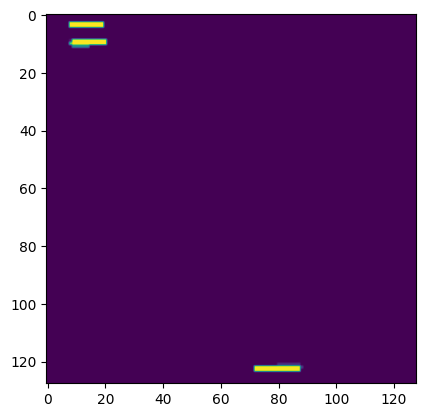

In [29]:
plt.imshow(tcl_map_resized)
plt.show()

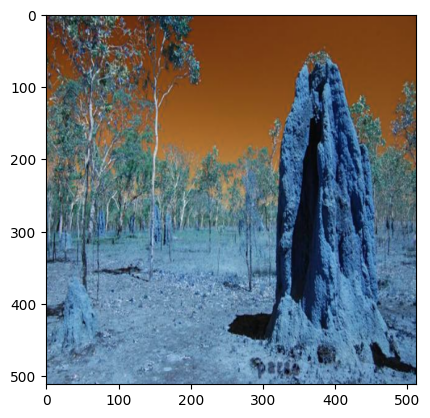

In [30]:
plt.imshow(image_resized)
plt.show()

In [31]:
image_resized.shape

(512, 512, 3)

In [32]:
input_data = np.expand_dims(image_resized, axis=0)

In [33]:
predictions = model.predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [34]:
tcl_map_resized.shape

(128, 128)

In [35]:
predictions[0].shape

(128, 128, 1)

In [36]:
ground_truth = tcl_map_resized.reshape((128,128))
prediction = predictions[0].reshape((128,128))

In [37]:
ground_truth.shape

(128, 128)

In [38]:
prediction.shape

(128, 128)

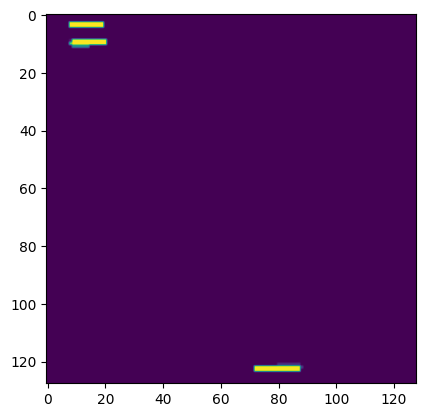

In [39]:
plt.imshow(ground_truth)
plt.show()

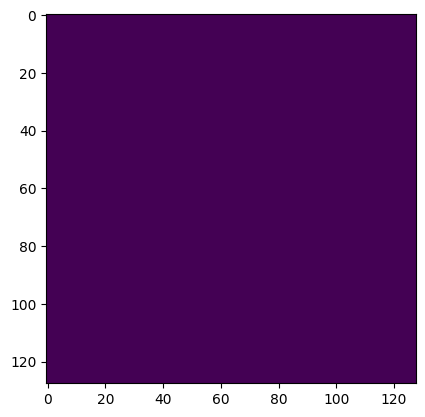

In [40]:
plt.imshow(prediction)
plt.show()

In [77]:
for i in range(len(prediction)):
    if np.sum(prediction) != 0:
        print(i)

In [79]:
for i in range(len(ground_truth)):
    if np.sum(ground_truth[i]) != 0:
        print(i)

3
4
8
9
10
11
12
120
121
122
123
124


In [ ]:
for i in range(len(prediction)):
    # for j in range(len(prediction[i])):
    #     if prediction[i,j]> 0:
    #         print("Index : ",i," , ",j," is: ",prediction[i,j])

In [48]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D

def build_tcl_model():
    input_img = Input(shape=(512, 512, 3))
    resnet_features = Resnet50_updated(input_img)  # Your ResNet with CAB feature extraction
    cab_out = CAB(resnet_features)
    tcl_output = Conv2D(1, (1, 1), activation='sigmoid')(cab_out)  # Single channel for TCL map
    model = Model(inputs=input_img, outputs=tcl_output)
    return model

model = build_tcl_model()
model.compile(optimizer=Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy'])


In [49]:
model.fit(
    x=x_train,  # or a generator
    y=y_train,
    epochs=50,
    batch_size=1,
)

Epoch 1/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.9675 - loss: nan
Epoch 2/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9657 - loss: nan
Epoch 3/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9672 - loss: nan
Epoch 4/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9674 - loss: nan
Epoch 5/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9680 - loss: nan
Epoch 6/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9660 - loss: nan
Epoch 7/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accuracy: 0.9666 - loss: nan
Epoch 8/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9660 - loss: nan
Epoch 9/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9672 - loss: nan
Epoch 10/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.9687 - loss: nan
Epoch 11/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9677 - loss: nan
Epoch 12/50
453/453 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step - accura